In [99]:
import requests
import bs4
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
url = 'https://api.meetup.com/SuperPythonTalks/events?&sign=true&photo-host=public&page=200&status=past'
r = requests.get(url)
events = r.json()

In [111]:
event = events[0]
event

{'created': 1487602834000,
 'description': '<p>Speaker: Ajayrama Kumaraswamy</p> <p><br/>10\xa0min:\xa0Introduction\xa0and\xa0overview<br/>10\xa0min:\xa0Introduction\xa0to\xa0Ipython\xa0notebook<br/>30\xa0min:\xa0Statistics\xa0with\xa0scipy.stats<br/>10\xa0min:\xa0Review<br/>30min:\xa0Practice\xa0session\xa0with\xa0Ipython\xa0notebook</p> <p><br/>Topics:<br/>1.\xa0Random\xa0Variables\xa0and\xa0Distribution\xa0functions<br/>\xa0i.\xa0Plotting\xa0Distribution\xa0Functions<br/>\xa0ii.\xa0Custom\xa0Random\xa0variables\xa0and\xa0drawing\xa0samples</p> <p><br/>2.\xa0Analyzing\xa0One\xa0Sample<br/>\xa0i.\xa0Basic\xa0statistics,\xa0histogram<br/>\xa0ii. Kernel\xa0Density\xa0Estimation\xa0and\xa0Distribution\xa0Fitting<br/>\xa0iii.\xa0Significance\xa0Tests:\xa0t-test\xa0and\xa0Kolmogorov-Smirnov\xa0test</p> <p><br/>3.\xa0Analyzing\xa0two\xa0samples<br/>\xa0iii.\xa0Significance\xa0tests</p> ',
 'duration': 5400000,
 'group': {'created': 1487602058000,
  'id': 22484197,
  'join_mode': 'open',
  '

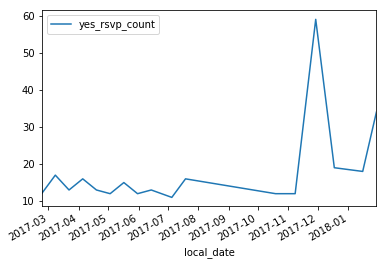

In [121]:
df = pd.DataFrame(events)[['yes_rsvp_count', 'name', 'local_date']]
df['Group'] = events[0]['group']['name']
df['local_date'] = pd.to_datetime(df.local_date)
df.set_index('local_date', inplace=True)
df.plot()

In [107]:
url2 = 'https://api.meetup.com/PyData-Munchen/events?&sign=true&photo-host=public&page=200&status=past'
r2 = requests.get(url)
events2 = r.json()

In [108]:
event2= events2[0]
event2

{'created': 1487537287000,
 'description': '<p><b>The meetup is merged with <a href="https://www.meetup.com/PyMunich/events/238287918/">pyMunich event</a>.</b></p> <p><b>Plan</b>\xa0</p> <p><br/>18:30 Doors open, snacks and drinks</p> <p>19:00\xa0Marc Bickel - Don\'t get Hadooped</p> <p>19:25 Oz Tiram - Useful Terminal Hacks</p> <p>19:50 Dmitry Trofimov: 42 PyCharm tips and tricks</p> <p>20:15 Community dialogue</p> <p>20:30 Beers &amp; Networking</p> <p><b>Registration:\xa0</b>no registration is needed, just go on RSVP list. Space is limited, grab your spot.</p> <p><br/>Looking forward to seeing you.</p> ',
 'group': {'created': 1469524975000,
  'id': 20225730,
  'join_mode': 'open',
  'lat': 48.13999938964844,
  'localized_location': 'München, Germany',
  'lon': 11.579999923706055,
  'name': 'PyData Munich',
  'region': 'en_US',
  'urlname': 'PyData-Munchen',
  'who': 'Members'},
 'id': '237833175',
 'link': 'https://www.meetup.com/PyData-Munchen/events/237833175/',
 'local_date': '2

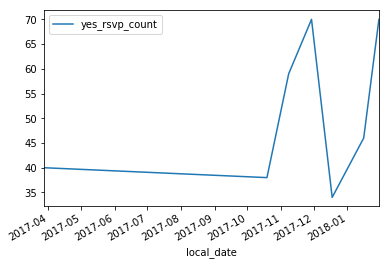

In [130]:
df2 = pd.DataFrame(events2)[['yes_rsvp_count', 'name', 'local_date']]
df2['Group'] = events2[0]['group']['name']

df2['local_date'] = pd.to_datetime(df2.local_date)
df2.set_index('local_date', inplace=True)
df2.plot()

In [ ]:
df3.plot()

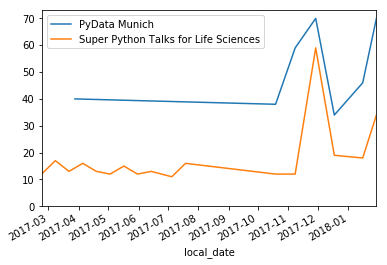

In [163]:
df3 = pd.concat((df, df2))
df3.sort_index()
groups = df3.groupby('Group')
fig, ax = plt.subplots()
groups.plot(ax=ax)
plt.legend(groups.groups.keys())
plt.ylim(0, ax.get_ylim()[1])
fig.savefig('Meetup_Attendance.png')

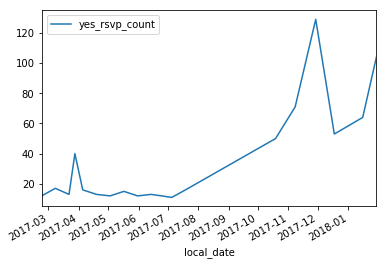

In [153]:
df3.reset_index().groupby('local_date').sum().plot()


In [ ]:
p